<a href="https://colab.research.google.com/github/SarahZhou2018/C551-Tutorials/blob/master/COMP551_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center> COMP551 Tutorial 3 : Scikit-learn </center></h1>
<h3><center> Nishant Mishra (built on <a href="https://github.com/jakevdp/sklearn_tutorial">Jake VanderPlas' tutorial</a>) </h3></center>
<h3><center> Feb 15 2021 </h3></center>

## Outline
*   [What is scikit-learn?](https://colab.research.google.com/drive/1txfUZby3sOvONstdCGmb14__W80VoypR?authuser=1#scrollTo=NJfvX8MaF-3W&line=10&uniqifier=1)
    * Important notes about data structure shape
    * Loading a sklearn dataset
*   [Linear Regression Model](https://colab.research.google.com/drive/1txfUZby3sOvONstdCGmb14__W80VoypR?authuser=1#scrollTo=whH7rRz3axoq&line=4&uniqifier=1)
    * Univariate Linear regression -- toy data
    * Multivariate Linear regression -- toy data 
* [Classification Model](https://colab.research.google.com/drive/1txfUZby3sOvONstdCGmb14__W80VoypR?authuser=1#scrollTo=vtz1HxEjeooh&line=3&uniqifier=1)
    * KNearestNeighbors classifier
    * Metrics to evaluate model performance
    * Train-test splitting of the data
* [Feature Extraction](https://colab.research.google.com/drive/1ZPvK90LoH3YLnG1MEA46d3sAiFvYeaVI#scrollTo=DXg2S37ZXHr4&line=1&uniqifier=1)
    * CountVectorizer
* [Dimensionality Reduction and clustering](https://colab.research.google.com/drive/1txfUZby3sOvONstdCGmb14__W80VoypR?authuser=1#scrollTo=lwP5Xd1jltim&line=3&uniqifier=1)
    * Principal Component Analysis (PCA)
        * PCA variance explained plot -- choosing ideal number of PCA components
        * PCA + scatter plot
    * KMeans clustering





## Scikit-Learn
[Scikit-Learn](http://github.com/scikit-learn/scikit-learn) is a Python package designed to provide access to well-known machine learning frameworks within python code, through a well-documented API. It has been built by hundreds of contributors from around the world, and is used across industry and academia.

Scikit-Learn is built upon Python's [Numpy (Numerical Python)](http://numpy.org/) and [SciPy (Scientific Python)](http://scipy.org/) libraries, which enable efficient in-core numerical and scientific computation within Python. 

We will call Scikit-learn as sklearn for shorthand hereon. In this tutorial, we will work with some small datasetes to illustrate basic functionalities of the sklearn library!

**Some important notes before kicking off**
* sklearn expects the data to be stored in two-dimensional array or matrix. Arrays can be either `numpy` arrays or in some cases `scipy.sparse` matrices. Size of array is expected to be `[n_samples, n_features]`
* Generally, we use `numpy` arrays to represent data. But prefer using `scipy.sparse` matrices if there are huge number of features with most of them being zeros for any given sample. 

In [ ]:
import numpy as np
import sklearn
import matplotlib.pyplot as plt 
plt.style.use('seaborn')

**Let's start with the Iris Dataset provided along with sklearn**

Features in the Iris dataset:
* sepal length (cm)
* sepal width (cm)
* petal length (cm)
* petal width (cm)

Target classes:
* Iris setosa
* Iris Versicolor
* Iris Virginica


In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
print(iris.keys())
print(iris.data.shape)
print(iris.feature_names)
print(iris.target.shape)
print(iris.target_names)

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
(150, 4)
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
(150,)
['setosa' 'versicolor' 'virginica']


Text(0, 0.5, 'sepal width (cm)')

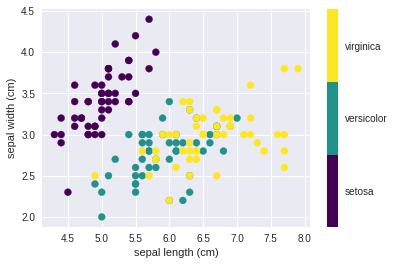

In [ ]:
# Let's quickly make some preliminary plots to see how the 3 classes look
x_index = 0
y_index = 1

# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.scatter(iris.data[:,x_index], iris.data[:,y_index], c=iris.target, cmap=plt.cm.get_cmap('viridis',3))
plt.colorbar(ticks=[0,1,2], format=formatter)
plt.clim(-0.5,2.5)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])

**Quick exercise**: Try to change `x_index` and `y_index` to find a combination that best separates the 3 classes

Heads Up! sklearn.preprocessing(Normalization, One hot encoding

## Basic ML model: Linear Regression

Four important functions of any sklearn estimator object:
* `fit()`: Estimates the model parameters to fit your training data
* `predict()`: Uses the estimated parameters to perform inference on data
* `predict_proba()`: **[Optional]** Returns the probability of prediction for classifiers 
* `score()`: Returns an estimate of "goodness" of fit of model. 0 indicates bad fit, 1 indicates great fit.

Generally, your ML framework should look like `fit()` --> `predict()`. Let's see it for a simple linear regression model

[3.]
1.9999999999999964


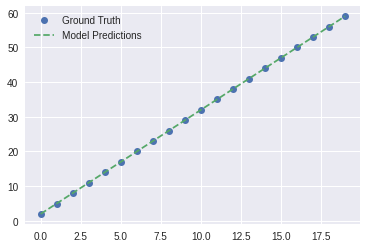

In [ ]:
# Import the model and initialize it
from sklearn.linear_model import LinearRegression
lin_model = LinearRegression()

# Create a toy dataset --> a linear line y= 3x+2
x = np.arange(20)
# x2 = 2*np.arange(20)
y = 3*x + 2

# the input data for sklearn should be 2D: (n_samples,n_feats)
x = x[:,np.newaxis]

# call model.fit()
lin_model.fit(x,y)

#print model parameters --> look at sklearn documentation to get the list of parameter names
print(lin_model.coef_)
print(lin_model.intercept_)

# Plot predictions
plt.plot(x,y,'o',label='Ground Truth')
plt.plot(x,lin_model.predict(x),'--',label='Model Predictions')
plt.legend()

### Multivariate Linear regression
Doing multivariate regression here, with the plotting corrected from the tutorial session :) 

(20, 2)
[3. 4.]
2.000000000000014


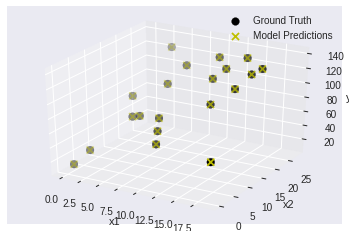

In [ ]:
# Import the model and initialize it
from sklearn.linear_model import LinearRegression
lin_model2 = LinearRegression()

# Create a toy dataset --> a linear line y= 3x+2
x1 = np.arange(20)
# x2 = 2*np.arange(20)    # this is what I had during the tutorial --> 
                          # having highly correlated (100%) features yielded incorrect results in lin regression
x2 = np.random.randint(0,30,size=(20,))
y = 3*x1 + 4*x2 + 2

# the input data for sklearn should be 2D: (n_samples,n_feats)
x = np.column_stack((x1,x2))

print(x.shape)
# # call model.fit()
lin_model2.fit(x,y)

# #print model parameters --> look at sklearn documentation to get the list of parameter names
print(lin_model2.coef_)
print(lin_model2.intercept_)

# # Plot predictions
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(x1,x2,y,marker='o',s=60,c='k',label='Ground Truth')
ax.scatter(x1,x2,lin_model2.predict(x),marker='x',s=50,c='y',label='Model Predictions')
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("y")
ax.legend()

**Quick exercise**: Repeat the same code with noise in the data and see how the model behaves

*Hint*: Add `np.random.rand()` values to `y`

## ML model: Classification

Let's go beyond Linear regression and look into classification for the Iris dataset

In [ ]:
# Import the dataset and model from sklearn
from sklearn import datasets, neighbors

# load the data into suitable arrays
iris = datasets.load_iris()
X,y = iris.data, iris.target

# create the model, here k-nearest neighbours model
knn = neighbors.KNeighborsClassifier(n_neighbors=4)

# behold the power of the model... I meant call model.fit()
knn.fit(X,y)

# Let's get a random datapoint from the dataset and check its prediction
idx = np.random.randint(0,X.shape[0])
test_data = X[idx:idx+1]  # Note: I could also have used X[idx], but that would have returned a 1D array, hence this
result = knn.predict(test_data)
result_prob = knn.predict_proba(test_data)
print("Model prediction prob: {}\nPredicted class: {}\nGround Truth class: {}".format(result_prob, iris.target_names[result], iris.target_names[y[idx]]))

Model prediction prob: [[1. 0. 0.]]
Predicted class: ['setosa']
Ground Truth class: setosa


**Quick exercises**: 
1. Plot the ground truth and predicted labels for all points (as we did while visualizing the dataset)
2. Use a different classifier, like `sklearn.svm.SVC` and observe the performance change, if any

### How good is my model?

Sklearn also provides metrics to evaluate your model performance. Let's look at the classification performance for our model above.

In [ ]:
# Let's import the sklearn confusion_matrix module
from sklearn.metrics import confusion_matrix

# Let's get the predicted labels for the entire dataset
y_pred = knn.predict(X)
print(confusion_matrix(y, y_pred))

[[50  0  0]
 [ 0 47  3]
 [ 0  3 47]]


F1 Score= (2\*Precision\*Recall)/(Precision+Recall)

In [ ]:
from sklearn.metrics import f1_score
y_pred = knn.predict(X)
print(f1_score(y, y_pred, average='micro'))

0.96


**Is this good enough?**

Well, ofcourse the model performance is great because we are training and evaluating on the same dataset. In ML though, we are more interested to evaluate generalization of algorithms to new/unseen data. 

Let's evaluate our model by training and testing on different subsets of the total dataset!

### How do we split our data into train and validation sets?

Sklearn to the rescue again!! --> Sklearn has functions to split your data into train and validation sets :) 

In [ ]:
# As always, import the desired module from sklearn
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y)

# Initialize a classifier to evaluate on this split data and then follow standard protocol --> fit() then predict()
knn2 = neighbors.KNeighborsClassifier(n_neighbors=4)
knn2.fit(Xtrain,ytrain)
ypred = knn2.predict(Xtest)
print(confusion_matrix(ytest,ypred))

[[15  0  0]
 [ 0 12  1]
 [ 0  0 10]]


Hmm, not bad!! So maybe this was a good model after all :D 

**Quick exercise**: Change the number of neighbours (`n_neighbors`) to 1 and see the difference in the two confusion matrices.

# Feature Extraction

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

corpus = ['This is the first document.',
          'This is the second second document.',
          'And the third one.',
          'Is this the first document?']
X = vectorizer.fit_transform(corpus)
vectorizer.get_feature_names()


['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']

In [ ]:
vectorizer.transform(['Something completely new.']).toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [ ]:
vectorizer.transform(['Document first is this first.']).toarray()

array([[0, 1, 2, 1, 0, 0, 0, 0, 1]])

TODO- Also checkout/implement Tf-Idf vectorizer

## Dealing with high-dimensional data: Dimensionality Reduction

So far, we were dealing with 4 features. What happens when we have 4000? or even more? 

A critical component of unsupervised learning is reducing the number of dimensions in the data to keep only "interesting" features or dimensions in the data. You have learned about PCA (Principal Component Analysis) in class as a popular method to do exactly this. 

Here, we will implement PCA from scratch on Python.... nah, let's just use the sklearn module for that and save time and effort today :) 

Just like supervised estimator objects, unsupervised estimators have four important functions:
* `fit()`: Estimates the model parameters to fit your training data
* `predict()`: Uses the estimates parameters to predict cluster labels
* `transform()`: Transforms original data to the reduced dimension data
* `fit_transform()`: Performs `fit()` and `transform()` in one step. Some estimators have this method, which increases efficiency.



### Variance explained plot: selecting number of components

We use either of the two rules to select number of principal components:
1. Knee rule from variance explained plot
2. Number of components that take together explain 95% (you can use some other number as well) variance -- cumulative variance explained plot 

Text(0.5, 1.0, 'Cumulative Variance Explained vs Principal Components')

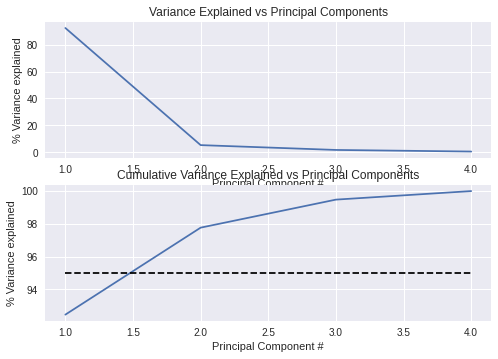

In [ ]:
# Loading the data from sklearn
from sklearn import datasets
iris = datasets.load_iris()

X,y = iris.data, iris.target

# Time to get them tools --> import and initialize
from sklearn.decomposition import PCA
pca2 = PCA()
pca2.fit(X)
num_pc_components = len(pca2.explained_variance_ratio_)
plt.subplot(2,1,1)
plt.plot(np.linspace(1,num_pc_components,num_pc_components),100*pca2.explained_variance_ratio_)
plt.xlabel("Principal Component #")
plt.ylabel("% Variance explained")
plt.title("Variance Explained vs Principal Components")

plt.subplot(2,1,2)
plt.plot(np.linspace(1,num_pc_components,num_pc_components),100*np.cumsum(pca2.explained_variance_ratio_))
plt.plot(np.linspace(1,num_pc_components,num_pc_components),95*np.ones((num_pc_components,)),'k--')
plt.xlabel("Principal Component #")
plt.ylabel("% Variance explained")
plt.title("Cumulative Variance Explained vs Principal Components")

### Visualizing PCA-reduced low-dimensional data

Text(0, 0.5, 'PC #2')

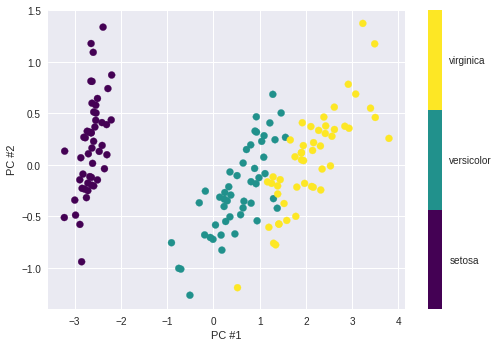

In [ ]:
# Loading the data from sklearn
from sklearn import datasets
iris = datasets.load_iris()

X,y = iris.data, iris.target

# Time to get them tools --> import and initialize
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
X_reduced = pca.transform(X)

# Let's make a scatter plot as before for this reduced dimension Iris data
# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.scatter(X_reduced[:,0], X_reduced[:,1], c=y, cmap=plt.cm.get_cmap('viridis',3))
plt.colorbar(ticks=[0,1,2], format=formatter)
plt.clim(-0.5,2.5)
plt.xlabel("PC #1")
plt.ylabel("PC #2")

### Clustering

Let's do some clustering (KMeans) on both high and low-dimensional data and observe the similarity of cluster membership with the ground truth labels

Text(0.5, 1.0, 'Ground truth labels')

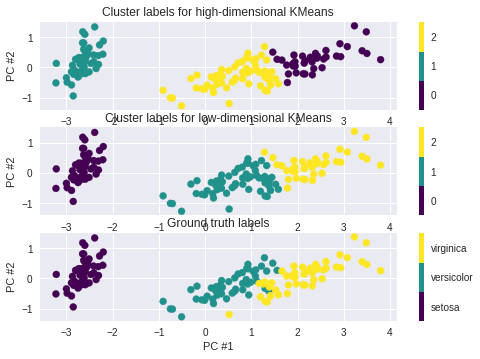

In [ ]:
# Import the KMeans module from sklearn
from sklearn.cluster import KMeans
kmeans_high = KMeans(n_clusters=3, random_state=0)
kmeans_high.fit(X)
y_pred_high = kmeans_high.predict(X)

kmeans_low = KMeans(n_clusters=3, random_state=0)
kmeans_low.fit(X_reduced)
y_pred_low = kmeans_low.predict(X_reduced)

# Plot 3 scatter plots -- two for high and low dimensional clustering results and one indicating the ground truth labels

plt.subplot(3,1,1)
plt.scatter(X_reduced[:,0], X_reduced[:,1], c=y_pred_high, cmap=plt.cm.get_cmap('viridis',3))
plt.colorbar(ticks=[0,1,2])
plt.clim(-0.5,2.5)
plt.xlabel("PC #1")
plt.ylabel("PC #2")
plt.title("Cluster labels for high-dimensional KMeans")

plt.subplot(3,1,2)
plt.scatter(X_reduced[:,0], X_reduced[:,1], c=y_pred_low, cmap=plt.cm.get_cmap('viridis',3))
plt.colorbar(ticks=[0,1,2])
plt.clim(-0.5,2.5)
plt.xlabel("PC #1")
plt.ylabel("PC #2")
plt.title("Cluster labels for low-dimensional KMeans")

plt.subplot(3,1,3)
plt.scatter(X_reduced[:,0], X_reduced[:,1], c=y, cmap=plt.cm.get_cmap('viridis',3))
plt.colorbar(ticks=[0,1,2], format=formatter)
plt.clim(-0.5,2.5)
plt.xlabel("PC #1")
plt.ylabel("PC #2")
plt.title("Ground truth labels")

**Quick exercise**: Evaluate the clustering performance for high and low-dimensional KMeans using the sklearn metrics you learned above.

Lookup: GridSearchCV

## References
1. [Jake VanderPlas' scikit-learn tutorial from Github](https://github.com/jakevdp/sklearn_tutorial)
2. [Scikit-learn](http://github.com/scikit-learn/scikit-learn)

## Useful Links
1. [Andreas Mueller's flow chart on how to choose your estimator](https://scikit-learn.org/stable/tutorial/machine_learning_map/)
2. [Scikit-learn Tutorials](https://scikit-learn.org/stable/tutorial/index.html)